In [1]:
from pylab import *
import numpy as np
from sklearn import datasets

In [2]:
faces = datasets.fetch_olivetti_faces()

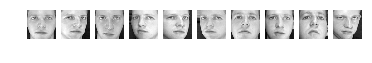

In [3]:
for i in range(10):
    face = faces.images[i]
    subplot(1, 10, i + 1)
    imshow(face.reshape((64, 64)), cmap='gray')
    axis('off')

In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [5]:
class Trainer:
    def __init__(self):
        self.results = {}
        self.imgs = faces.images
        self.index = 0
        
    def increment_face(self):
        if self.index + 1 >= len(self.imgs):
            return self.index
        else:
            while str(self.index) in self.results:
                print(self.index)
                self.index += 1
            return self.index
    
    def record_result(self, smile=True):
        self.results[str(self.index)] = smile

Button(description='Osmijeh', style=ButtonStyle())

Button(description='Nije osmijeh', style=ButtonStyle())

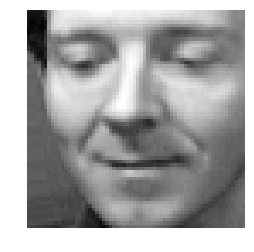

In [6]:
trainer = Trainer()
button_smile = widgets.Button(description='Osmijeh')
button_no_smile = widgets.Button(description='Nije osmijeh')

def display_face(face):
    clear_output()
    imshow(face, cmap='gray')
    axis('off')
    display(button_smile)
    display(button_no_smile)
    
def update_smile(b):
    clear_output()
    trainer.record_result(smile=True)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

def update_no_smile(b):
    clear_output()
    trainer.record_result(smile=False)
    trainer.increment_face()
    display_face(trainer.imgs[trainer.index])

button_no_smile.on_click(update_no_smile)
button_smile.on_click(update_smile)

display_face(trainer.imgs[trainer.index])

In [7]:
import json

In [ ]:
#spremanje rezultata
#with open('results.xml', 'w') as f:
#    json.dump(trainer.results, f)

In [8]:
results = json.load(open('results.xml'))
trainer.results = results

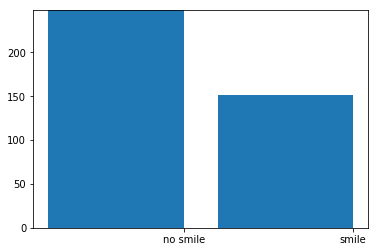

In [9]:
yes, no = (sum([trainer.results[x] == True for x in trainer.results]), 
            sum([trainer.results[x] == False for x in trainer.results]))
bar([0, 1], [no, yes])
ylim(0, max(yes, no))
xticks([0.4, 1.4], ['no smile', 'smile']);

In [10]:
smiling_indices = [int(i) for i in trainer.results if trainer.results[i] == True]

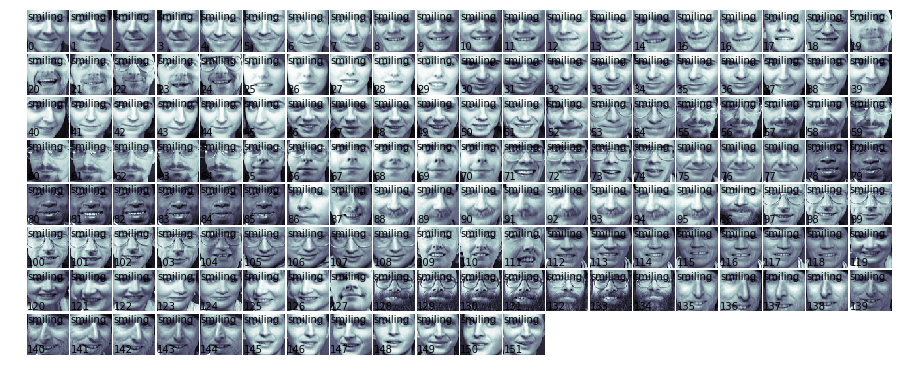

In [11]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[smiling_indices[i]], cmap=plt.cm.bone)
    
    # label the image with the target value
    p.text(0, 14, "smiling")
    p.text(0, 60, str(i))
    p.axis('off')

In [12]:
not_smiling_indices = [int(i) for i in trainer.results if trainer.results[i] == False]

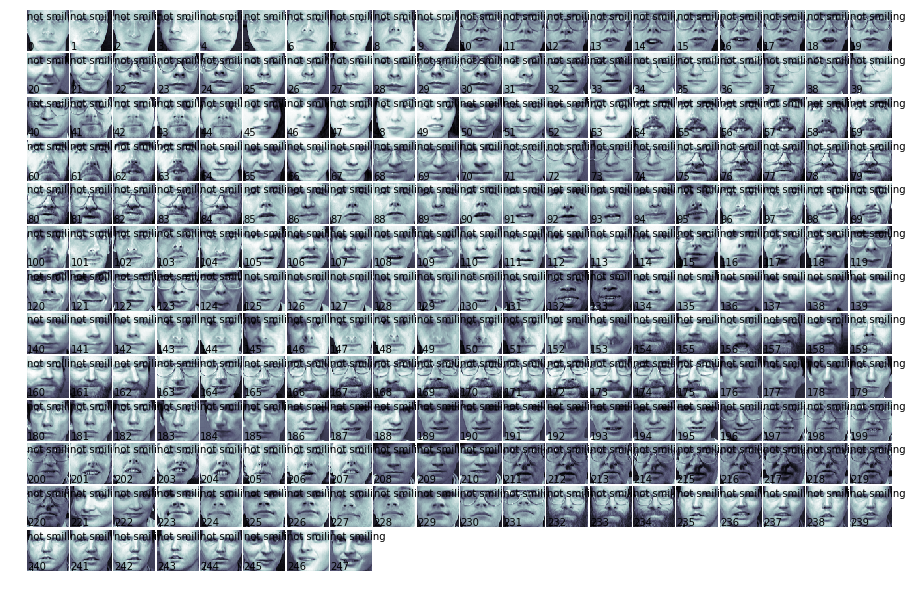

In [13]:
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(len(not_smiling_indices)):
    # plot the images in a matrix of 20x20
    p = fig.add_subplot(20, 20, i + 1)
    p.imshow(faces.images[not_smiling_indices[i]], cmap=plt.cm.bone)

    # label the image with the target value
    p.text(0, 14, "not smiling")
    p.text(0, 60, str(i))
    p.axis('off')

In [14]:
from sklearn.svm import SVC
svc_1 = SVC(kernel='linear')

In [15]:
indices = [int(i) for i in trainer.results]
data = faces.data[indices, :]

In [16]:
target = [trainer.results[i] for i in trainer.results]
target = array(target).astype(int32)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=0.25, random_state=0)

In [18]:
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import sem

def evaluate_cross_validation(clf, X, y, K):
    # create a k-fold cross validation iterator
    cv = KFold(K, shuffle=True, random_state=0)
    # by default the score used is the one returned by score method of the estimator (accuracy)
    scores = cross_val_score(clf, X, y, cv=cv)
    print (scores)
    print ("Mean score: {0:.3f} (+/-{1:.3f})".format(
        np.mean(scores), sem(scores)))

In [20]:
evaluate_cross_validation(svc_1, X_train, y_train, 5)

[0.76666667 0.85       0.86666667 0.81666667 0.81666667]
Mean score: 0.823 (+/-0.017)


In [21]:

from sklearn import metrics

def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print ("Preciznost na training setu:")
    print (clf.score(X_train, y_train))
    print ("Preciznost na testing setu:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    print (metrics.confusion_matrix(y_test, y_pred))

In [22]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test)

Preciznost na training setu:
1.0
Preciznost na testing setu:
0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90        73
           1       0.70      0.78      0.74        27

   micro avg       0.85      0.85      0.85       100
   macro avg       0.81      0.83      0.82       100
weighted avg       0.86      0.85      0.85       100

Confusion Matrix:
[[64  9]
 [ 6 21]]


In [23]:
def display_face_and_prediction():
    index = randint(0, 400)
    face = faces.images[index]
    display_face(face)
    check = faces.data[index, :]
    check = check.reshape(1, -1)
    print("this person is smiling: " + str(svc_1.predict(check) == 1))

Button(description='Osmijeh', style=ButtonStyle())

Button(description='Nije osmijeh', style=ButtonStyle())

this person is smiling: [False]


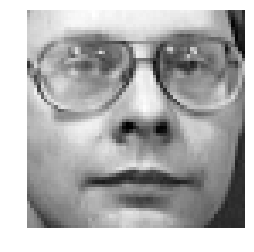

In [26]:
display_face_and_prediction()

In [27]:
import cv2

In [90]:
input_face = cv2.imread('face7.jpg')

In [91]:
cascPath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascPath)
gray = cv2.cvtColor(input_face, cv2.COLOR_BGR2GRAY)
detected_faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=6,
        minSize=(100, 100),
        flags=cv2.CASCADE_SCALE_IMAGE
    )
detected_faces

array([[689, 174, 229, 229]], dtype=int32)

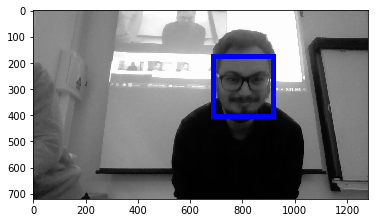

In [92]:
from matplotlib.patches import Rectangle
ax = gca()
ax.imshow(gray, cmap='gray')
for (x, y, w, h) in detected_faces:
    ax.add_artist(Rectangle((x, y), w, h, fill=False, lw=5, color='blue'))

In [93]:
original_extracted_face = gray[y:y+h, x:x+w]
horizontal_offset = int(0.18 * w)   
vertical_offset = int(0.18 * h)     
extracted_face = gray[y+vertical_offset:y+h, x+horizontal_offset:x-horizontal_offset+w]

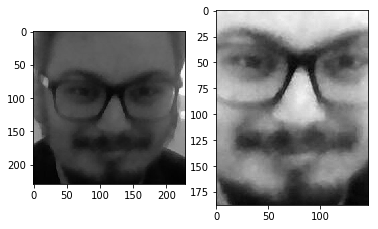

In [94]:
subplot(121)
imshow(original_extracted_face, cmap='gray')
subplot(122)
imshow(extracted_face, cmap='gray')

In [95]:
from scipy.ndimage import zoom

In [96]:
new_extracted_face = zoom(extracted_face, (64. / extracted_face.shape[0], 
                                           64. / extracted_face.shape[1]))

In [97]:
new_extracted_face = new_extracted_face.astype(float32)

In [98]:
new_extracted_face /= float(new_extracted_face.max())

Button(description='Osmijeh', style=ButtonStyle())

Button(description='Nije osmijeh', style=ButtonStyle())

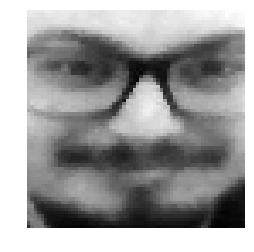

In [99]:
display_face(new_extracted_face[:, :])

In [100]:
check2 = new_extracted_face.ravel()
check2 = check2.reshape(1, -1)

In [101]:
print("Smijem li se?")
if(svc_1.predict(check2) == 1):
    print("Smijem se")
else:
    print("Ne smijem se")

Smijem li se?
Smijem se
